<a href="https://colab.research.google.com/github/dharmendrapal20592/Machine-Learning-Project/blob/master/Bank_data_classification_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [0]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
dataset.shape

(10000, 14)

In [0]:
cat_features = dataset.dtypes[dataset.dtypes == 'object'].index
print('No of categorical fetures:',len(cat_features),'\n')
print(cat_features)
print('*'*100)

num_features = dataset.dtypes[dataset.dtypes != 'object'].index
print('No of numerical fetures:',len(num_features),'\n')
print(num_features)

No of categorical fetures: 3 

Index(['Surname', 'Geography', 'Gender'], dtype='object')
****************************************************************************************************
No of numerical fetures: 11 

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [0]:
# dataset[cat_features].head()
dataset[cat_features].head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [0]:
dataset[num_features].head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [0]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# EDA on numerical variables


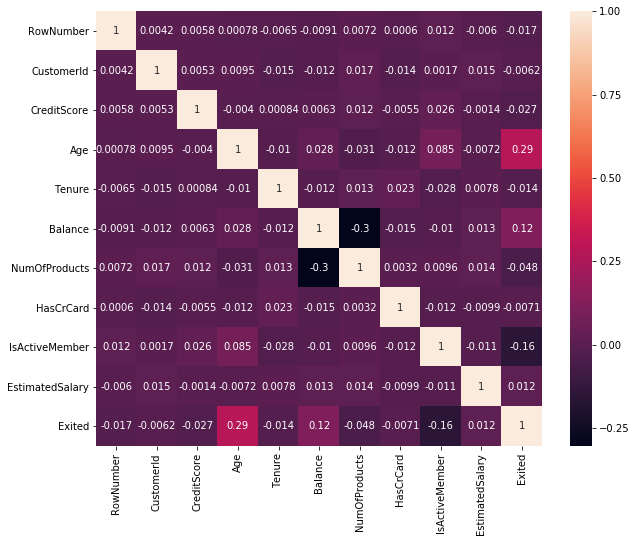

In [0]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True )

In [0]:
dataset.drop(['RowNumber','CustomerId',], axis = 1, inplace = True)

# EDA on categorical  variables

In [0]:
dataset.drop('Surname', axis = 1, inplace = True)

In [0]:
from sklearn.preprocessing import LabelEncoder
lavel_1 = LabelEncoder()
dataset['Geography'] = lavel_1.fit_transform(dataset['Geography'])


In [0]:
lavel_2 = LabelEncoder()
dataset['Gender'] = lavel_2.fit_transform(dataset['Gender'])

In [0]:
dataset = pd.get_dummies(dataset, drop_first=True, columns=['Geography'])

In [0]:
dataset.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [0]:
X = dataset.drop('Exited', axis = 1)
y = dataset['Exited']

In [0]:
# split the data into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
print('shape of X_train:', X_train.shape)
print('shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

shape of X_train: (8000, 11)
shape of X_test: (2000, 11)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


# Feature stendardization

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# beald model with Ann

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [0]:
# Model
model = Sequential()
model.add(Dense(X.shape[1], activation= 'relu', input_dim =X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 1,797
Trainable params: 1,797
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])

In [0]:
model.fit(X_train, y_train.to_numpy(), batch_size = 10, epochs = 10, verbose=1)

Train on 8000 samples
Epoch 1/10
8000/8000 [==============================] - 3s 324us/sample - loss: 0.4484 - accuracy: 0.8060
Epoch 2/10
8000/8000 [==============================] - 2s 218us/sample - loss: 0.3763 - accuracy: 0.8476
Epoch 3/10
8000/8000 [==============================] - 2s 215us/sample - loss: 0.3556 - accuracy: 0.8553
Epoch 4/10
8000/8000 [==============================] - 2s 239us/sample - loss: 0.3452 - accuracy: 0.8591
Epoch 5/10
8000/8000 [==============================] - 2s 263us/sample - loss: 0.3414 - accuracy: 0.8616
Epoch 6/10
8000/8000 [==============================] - 2s 207us/sample - loss: 0.3388 - accuracy: 0.8606
Epoch 7/10
8000/8000 [==============================] - 2s 202us/sample - loss: 0.3351 - accuracy: 0.8618
Epoch 8/10
8000/8000 [==============================] - 2s 228us/sample - loss: 0.3357 - accuracy: 0.8618
Epoch 9/10
8000/8000 [==============================] - 2s 203us/sample - loss: 0.3327 - accuracy: 0.8620
Epoch 10/10
8000/8000 [=

In [0]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
y_pred = model.predict_classes(X_test)


0.86

In [0]:
print(accuracy_score(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

0.86


[[1492   85]
 [ 195  228]]


              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1577
           1       0.73      0.54      0.62       423

   micro avg       0.86      0.86      0.86      2000
   macro avg       0.81      0.74      0.77      2000
weighted avg       0.85      0.86      0.85      2000

